# Autocorrelation & partial autocorrelation


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

DATA_PATH = "../data/raw"

plt.style.use("ggplot")


/usr/lib/python3/dist-packages/cvxopt/__init__.py:136: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if val is 0: val = None


In [4]:
co2_levels = pd.read_csv(
    os.path.join(DATA_PATH, "co2_levels.csv"),
    index_col=["datestamp"],
    parse_dates=["datestamp"],
)
co2_levels.fillna(method="bfill", inplace=True)


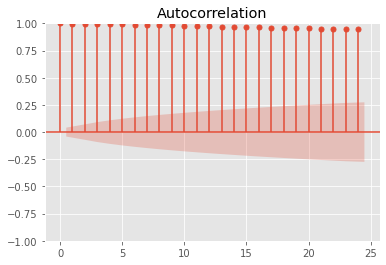

In [5]:
# Import required libraries
import matplotlib.pyplot as plt

# plt.style.use("fivethirtyeight")
from statsmodels.graphics import tsaplots

# Display the autocorrelation plot of your time series
fig = tsaplots.plot_acf(co2_levels["co2"], lags=24)

# Show plot
plt.show()


/home/prime/.local/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


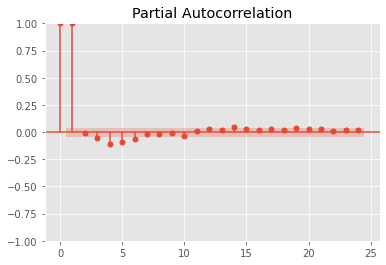

In [6]:
# Import required libraries
import matplotlib.pyplot as plt

# plt.style.use("fivethirtyeight")
from statsmodels.graphics import tsaplots

# Display the partial autocorrelation plot of your time series
fig = tsaplots.plot_pacf(co2_levels["co2"], lags=24)

# Show plot
plt.show()


## Seasonality, trend & noise in time series data


In [7]:
# Import statsmodels.api as sm
import statsmodels.api as sm

# Perform time series decompositon
decomposition = sm.tsa.seasonal_decompose(co2_levels)

# Print the seasonality component
print(decomposition.seasonal)


datestamp
1958-03-29    1.028042
1958-04-05    1.235242
1958-04-12    1.412344
1958-04-19    1.701186
1958-04-26    1.950694
                ...   
2001-12-01   -0.525044
2001-12-08   -0.392799
2001-12-15   -0.134838
2001-12-22    0.116056
2001-12-29    0.285354
Name: seasonal, Length: 2284, dtype: float64


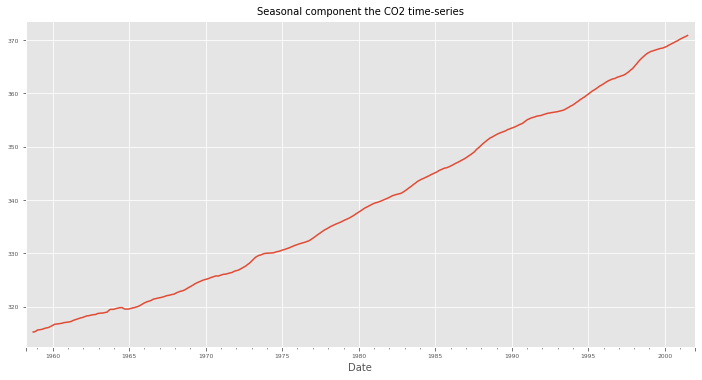

In [8]:
# Extract the trend component
trend = decomposition.trend

# Plot the values of the trend
ax = trend.plot(figsize=(12, 6), fontsize=6)

# Specify axis labels
ax.set_xlabel("Date", fontsize=10)
ax.set_title("Seasonal component the CO2 time-series", fontsize=10)
plt.show()


## Visualising airline data


In [14]:
from pylab import rcParams

rcParams["figure.figsize"] = (16, 9)


In [9]:
airline = pd.read_csv(
    os.path.join(DATA_PATH, "airline.csv"), parse_dates=["Month"], index_col=["Month"]
)


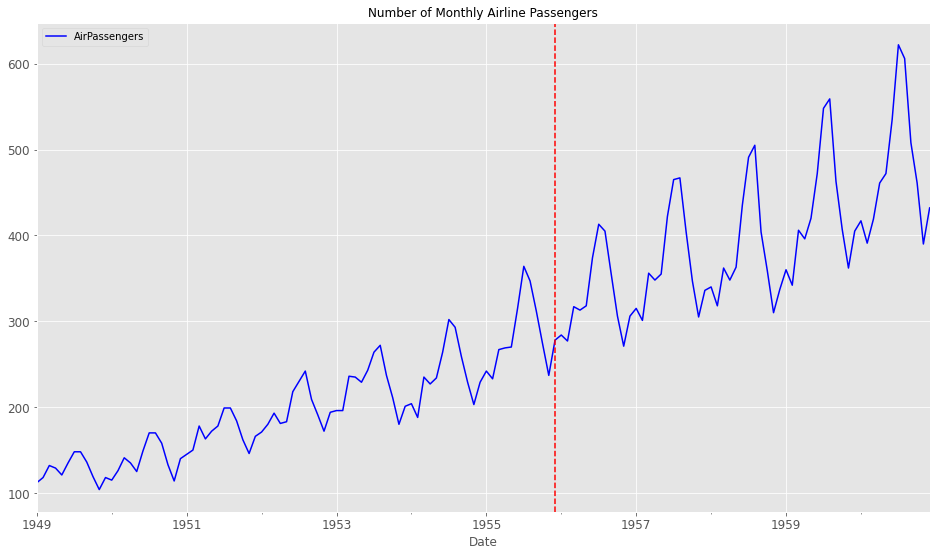

In [15]:
# Plot the time series in your DataFrame
ax = airline.plot(color="blue", fontsize=12)

# Add a red vertical line at the date 1955-12-01
ax.axvline("1955-12-01", color="red", linestyle="--")

# Specify the labels in your plot
ax.set_xlabel("Date", fontsize=12)
ax.set_title("Number of Monthly Airline Passengers", fontsize=12)
plt.show()


In [11]:
# Print out the number of missing values
print(airline.isna().sum())

# Print out summary statistics of the airline DataFrame
print(airline.describe())


AirPassengers    0
dtype: int64
       AirPassengers
count     144.000000
mean      280.298611
std       119.966317
min       104.000000
25%       180.000000
50%       265.500000
75%       360.500000
max       622.000000


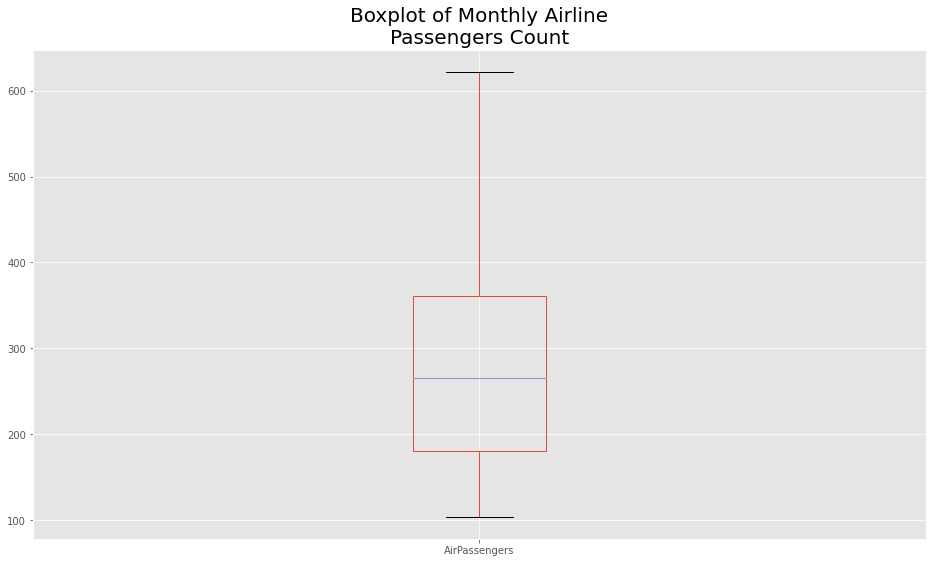

In [16]:
# Display boxplot of airline values
ax = airline.boxplot()

# Specify the title of your plot
ax.set_title("Boxplot of Monthly Airline\nPassengers Count", fontsize=20)
plt.show()


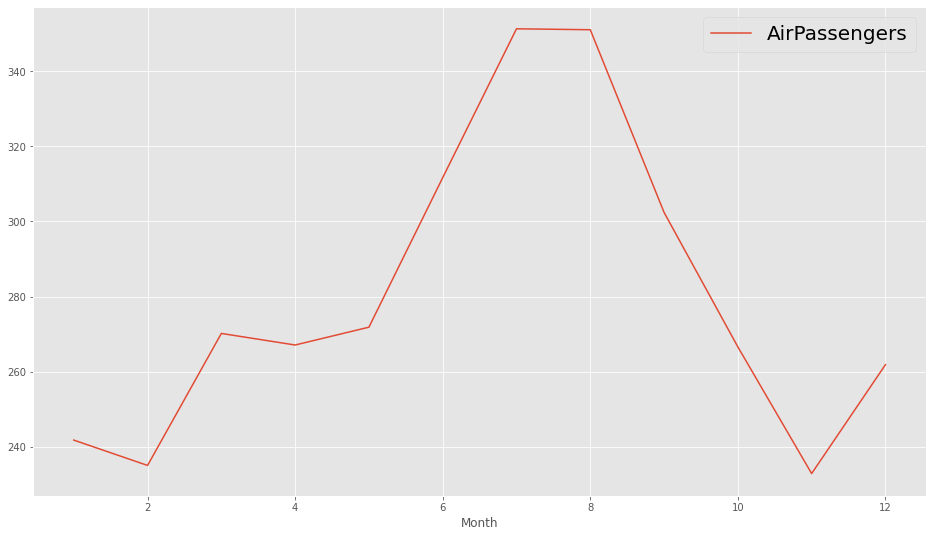

In [17]:
# Get month for each dates from the index of airline
index_month = airline.index.month

# Compute the mean number of passengers for each month of the year
mean_airline_by_month = airline.groupby(index_month).mean()

# Plot the mean number of passengers for each month of the year
mean_airline_by_month.plot()
plt.legend(fontsize=20)
plt.show()


In [18]:
# Import statsmodels.api as sm
import statsmodels.api as sm

# Perform time series decompositon
decomposition = sm.tsa.seasonal_decompose(airline)

# Extract the trend and seasonal components
trend = decomposition.trend
seasonal = decomposition.seasonal


In [19]:
airline_decomposed = pd.concat([trend, seasonal], axis=1)


            trend   seasonal
Month                       
1949-01-01    NaN -24.748737
1949-02-01    NaN -36.188131
1949-03-01    NaN  -2.241162
1949-04-01    NaN  -8.036616
1949-05-01    NaN  -4.506313


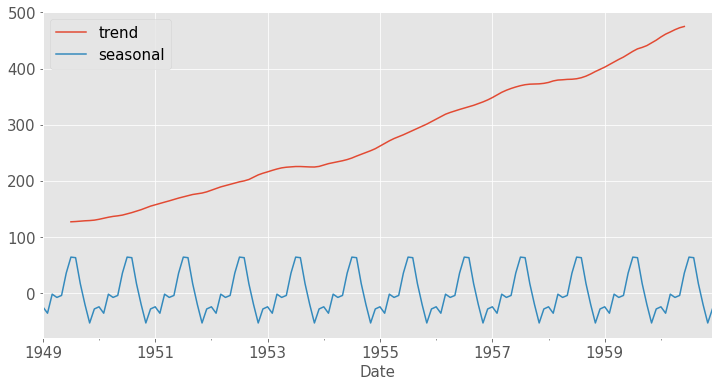

In [20]:
# Print the first 5 rows of airline_decomposed
print(airline_decomposed.head(n=5))

# Plot the values of the airline_decomposed DataFrame
ax = airline_decomposed.plot(figsize=(12, 6), fontsize=15)

# Specify axis labels
ax.set_xlabel("Date", fontsize=15)
plt.legend(fontsize=15)
plt.show()
